In [17]:
import matplotlib.pyplot as plt

In [18]:
'''
定义文本框和箭头格式
'''
decisionNode = dict(boxstyle = 'sawtooth',fc='0.8')
leafNode = dict(boxstyle = 'round4', fc='0.8')
#arrow_args = dict(arrowstyle='<-', connectionstyle='arc3,rad=.0')
arrow_args = dict(arrowstyle="<-")

In [21]:
def retrieveTree(i):
    listOfTrees =[{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}},
                  {'no surfacing': {0: 'no', 1: {'flippers': {0: {'head': {0: 'no', 1: 'yes'}}, 1: 'no'}}}}]
    return listOfTrees[i]

In [22]:
'''
获取树的叶子数
'''
def getNumLeafs(myTree):
    numLeafs = 0
    firstStr = list(myTree.keys())[0]
    #python3中myTree.keys()返回的是dict_keys,不在是list,所以不能使用myTree.keys()[0]的方法获取结点属性，可以使用list(myTree.keys())[0]
    secondDict = myTree[firstStr]

    for key in secondDict.keys():
        if type(secondDict[key]).__name__ == 'dict':
            numLeafs += getNumLeafs(secondDict[key])
        else:
            numLeafs +=1

    return numLeafs

In [23]:
'''
获得树的深度
'''
def getTreeDepth(myTree):
     maxDepth=0
     firstStr = list(myTree.keys())[0]
     secondDict = myTree[firstStr]

     for key in secondDict.keys():
         if type(secondDict[key]).__name__ == 'dict':
             thisDepth = 1 + getTreeDepth(secondDict[key])
         else:
             thisDepth =1
         if thisDepth > maxDepth:
             maxDepth = thisDepth

     return maxDepth



In [31]:

'''
父子节点之间填充文本信息
'''
def plotMidText(cntrPt, parentPt, txtString):
    xMid = (parentPt[0]+cntrPt[0])/2.0
    yMid = (parentPt[1]+cntrPt[1])/2.0
    createPlot.ax1.text(xMid, yMid, txtString)



In [33]:
'''
绘制带箭头的注解
'''
def plotNode(nodeText, centerPt, parentPt,nodeType):
    createPlot.ax1.annotate(nodeText,xy=parentPt,xycoords='axes fraction', \
                            xytext=centerPt, textcoords ='axes fraction',\
                            va='center',ha='center', \
                            arrowprops=arrow_args,bbox=nodeType)

In [37]:

'''
执行画树主
'''
def plotTree(myTree, parentPt, nodeTxt):
    #计算宽和高
    numLeafs = getNumLeafs(myTree)
    depthTree = getTreeDepth(myTree)
    firstStr = list(myTree.keys())[0]
    cntrPt = (plotTree.xOff + (1.0+float(numLeafs))/2.0/plotTree.totalW,plotTree.yOff)

    print('plotTree off:({},{}),parentPt:{},cntrPt:{}'.format(plotTree.xOff, plotTree.yOff, parentPt, cntrPt))

    plotMidText(cntrPt, parentPt, nodeTxt)
    plotNode(firstStr, cntrPt, parentPt, decisionNode)
    #以上完成画树的根节点，及上层的箭头注释
    
    #根节点的每个子节点都是一个字典
    secondDict = myTree[firstStr]
    plotTree.yOff -= 1.0/plotTree.totalD
    for key in secondDict.keys():
        if type(secondDict[key]).__name__ == 'dict':
            plotTree((secondDict[key]),cntrPt,str(key))
        else:
            plotTree.xOff += 1.0/plotTree.totalW
            plotNode(secondDict[key],(plotTree.xOff, plotTree.yOff),cntrPt, leafNode)
            plotMidText((plotTree.xOff,plotTree.yOff),cntrPt,str(key))
    plotTree.yOff = plotTree.yOff + 1.0/plotTree.totalD


In [39]:
'''
画树
'''
def createPlot(inTree):
    fig = plt.figure(1,facecolor='white')
    fig.clf()
    axprops = dict(xticks=[], yticks=[])

    createPlot.ax1 = plt.subplot(111,frameon=False,**axprops)
    #createPlot.ax1.set_ylim(0, 1)
    #createPlot.ax1.set_xlim(0, 1)

    plotTree.totalW = float(getNumLeafs(inTree)*4)
    plotTree.totalD = float(getTreeDepth(inTree)*4)

    plotTree.xOff = -0.5/plotTree.totalW
    plotTree.yOff = 1.0

    plotTree(inTree,(0.5,1.0),'')

    plt.show()

{'no surfacing': {0: 'no', 1: {'flippers': {0: {'head': {0: 'no', 1: 'yes'}}, 1: 'no'}}}}
leaf: 4
depth: 3
plotTree off:(-0.125,1.0),parentPt:(0.5, 1.0),cntrPt:(0.5, 1.0)
plotTree off:(0.125,0.6666666666666667),parentPt:(0.5, 1.0),cntrPt:(0.625, 0.6666666666666667)
plotTree off:(0.125,0.3333333333333334),parentPt:(0.625, 0.6666666666666667),cntrPt:(0.5, 0.3333333333333334)


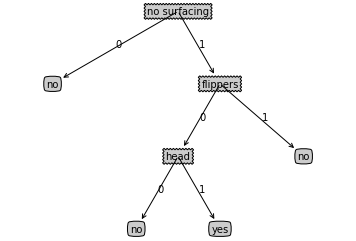

In [40]:
'''
myTree = retrieveTree(1)
    #myTree = {'no surfaceing':{0:'no',1:{'flippers':{0:'no',1:'yes'}},3:'maybe'}}
print(myTree)
print('leaf:',getNumLeafs(myTree))
print('depth:',getTreeDepth(myTree))

createPlot(myTree)
'''